<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/Desafio_de_Detec%C3%A7%C3%A3o_e_Redu%C3%A7%C3%A3o_de_Fraudes_no_Setor_Financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio de Detecção e Redução de Fraudes no Setor Financeiro


Embora muito se fale da capacidade de geração de receita das empresas, um dos principais entraves para o sucesso de um negócio está atrelado ao seu custo. A captação de clientes se tornou cada vez mais penosa, assim como a manutenção da carteira. Com isso, a gestão de custo se tornou um fator extremamente estratégico para garantir a margem e o crescimento das empresas.

No entanto, o advento no mundo digital para expandir o negócio ou garantir a sua sobrevivência enfrenta um grande desafio para redução do custo operacional: as fraudes, sobretudo as relacionadas às operações comerciais e financeiras, que impactam, na prática, todos os tipos de indústrias e setores da economia. Do governo, ao banco, do varejista ao microempreendedor, todos precisam conhecer e enfrentar este desafio.

O relatório da ACFE (https://www.acfe.com/rtm2019/index.html#Learn) (Association of Certified Fraud Examiners) corrobora com esta percepção ao apontar uma previsão de crescimento de 60% nos próximos dois anos nos investimentos em antifraude, uma clara amostra do desafio que as organizações estão enfrentando. No entanto, o mesmo relatório aponta que 58% das empresas declaram não ter níveis, recursos e profissionais suficientes para atuar em ações antifraude (veja quadro abaixo:)

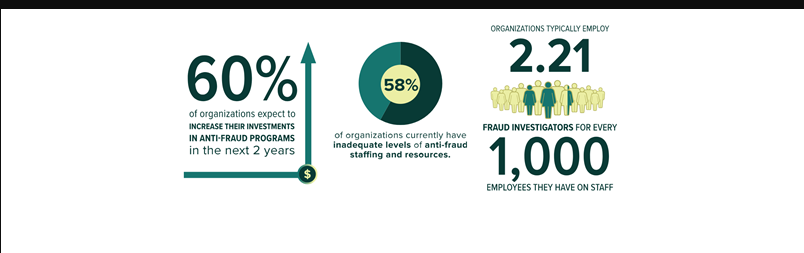

Fonte: ACFE (https://www.acfe.com/rtm2019/index.html#Learn)

Considerando que o objetivo dos fraudadores em geral é terem benefícios monetários, torna evidente que o setor financeiro é um dos seus principais alvos. Mesmo o crescente investimento em ações preventivas e de monitoramento não têm sido suficientes para barrar ou frear a escalada dos criminosos. De acordo com a Psafe (https://www.psafe.com/), de janeiro a agosto do ano passado foram 920 mil casos somente no Brasil e a cada minuto, 3,6 fraudes acontecem no país. Foram detectados, por exemplo, mais de 11 milhões de tentativas de fishing bancário.

A indústria financeira possui grande representatividade no Brasil e no mundo. Para se ter uma ideia, os ativos dos bancos no Brasil somam R$ 7,4 trilhões, superando o próprio PIB do país (Infomoney)(https://www.infomoney.com.br/economia/ativos-de-bancos-somam-r-74-trilhoes-e-superam-pib-brasileiro/), 25-05-2020).

 De acordo com a ABECS(https://www.abecs.org.br/) (Associação Brasileira das Empresas de Cartão de Crédito e Serviços), foram movimentados R$ 558 bilhões no primeiro trimestre de 2021 e os cartões de crédito representaram R$ 335 bilhões desse total. Foram 6,5 bilhões de transações, um crescimento de 11,8%, com destaque para cartão de débito que apresentou aumento de 163% (veja quadros abaixo). Apesar da opulência destes números, o impacto das fraudes é igualmente gritante. Os crimes cibernéticos, considerando apenas transações de cartão de crédito, já projetavam em 2018 um impacto de 6 trilhões de dólares de perda de receita até 2021 ao redor do mundo.

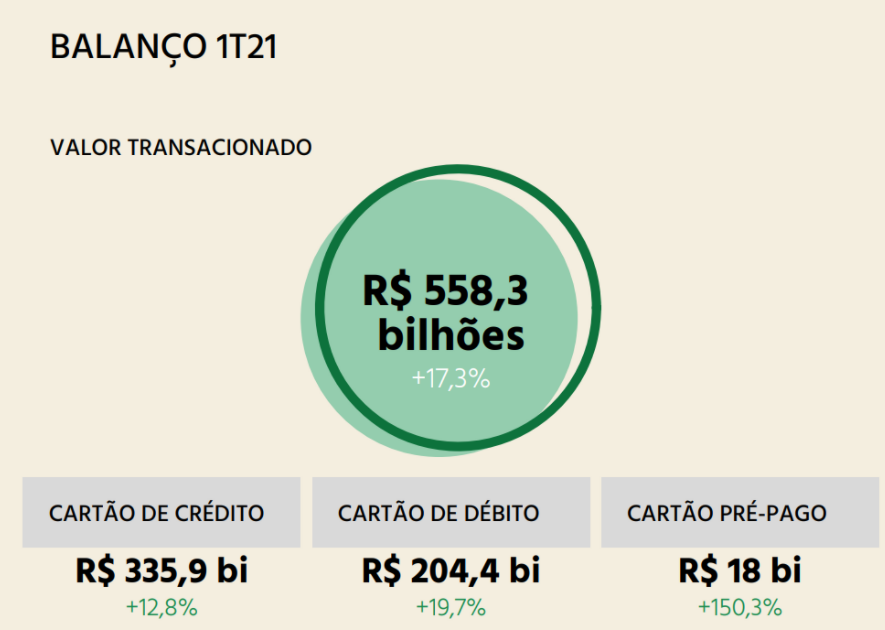

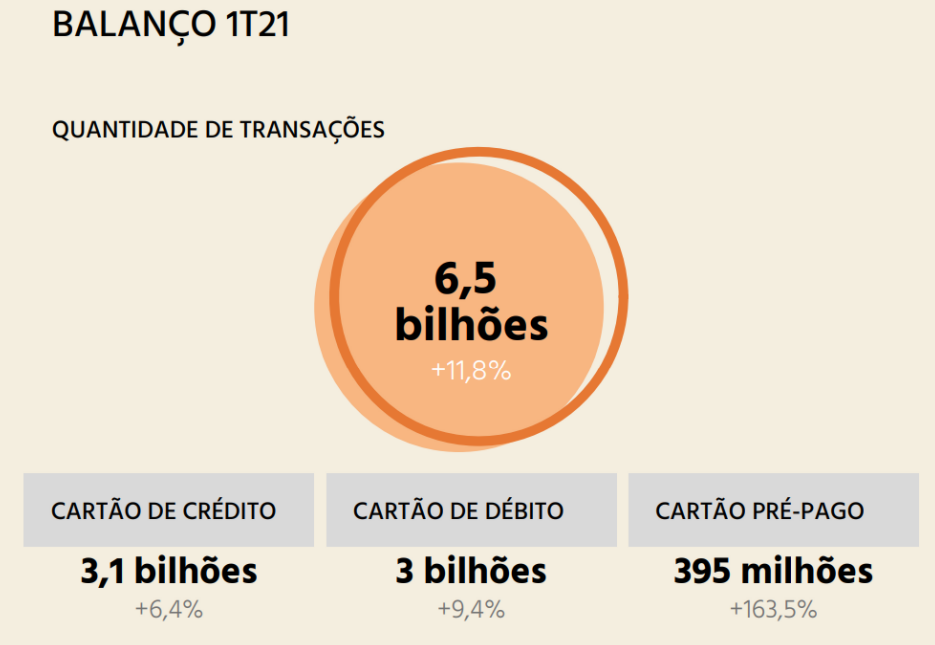


Fonte: ABECS (https://api.abecs.org.br/wp-content/uploads/2021/05/COLETIVA-ABECS-1T21-1.pdf)

Não à toa, no relatório de novembro de 2020 (https://api.abecs.org.br/wp-content/uploads/2020/11/Apresentacao-Balanco-3T20.pdf) é listado entre as prioridades do setor financeiro a redução da fraude e a utilização de sistema de inteligência artificial para monitoramento dela. De acordo com a Febraban(https://portal.febraban.org.br/) (Federação Brasileira dos Bancos) para mitigar este risco é previsto um gasto anual da ordem de R$ 2 bilhões de reais em TI por ano no Brasil. Porém, o risco é potencializado não somente pela sofisticação dos cyber criminosos, mas também pela insatisfação do consumidor que não só abandona a carteira de clientes, como também se utilizam do próprio código do consumidor, que garante indenização em dobro dos valores cobrados. Tudo isso, sem considerar as ações judiciais por danos morais e materiais que podem ser impetradas pelo consumidor. Segundo o Conselho Nacional de Justiça (CNJ), a projeção é que 28% das ações em trâmite tenham como réus instituições financeiras.

Neste cenário, a inteligência artificial surge como uma ferramenta que dá mais robustez, agilidade e flexibilidade para combater a fraude, trabalhando 24 horas por dia, 7 dias por semana, tornando-se um caminho mais do que possível, necessário para que as instituições financeiras possam combater de forma efetiva os fraudadores. Um exemplo disso é a American Express, com mais de 115 milhões de cartões de crédito ativos, que combate às fraudes utilizando inferência e Deep Learning, reduzindo gastos relacionados a fraudes em U$ 1,2 trilhões, em processos de detecção que acontecem em milisegundos. Fato que garante à empresa o menor índice de fraudes no mundo por 13 anos consecutivos.


IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [1]:
!pip install -U scikit-learn
!pip install imblearn
!pip install fast_ml

     |████████████████████████████████| 42 kB 465 kB/s 


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Normalizer
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, roc_auc_score
from fast_ml.model_development import train_valid_test_split
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = pd.read_csv('fraud_detection_dataset.csv')

DICIONÁRIO DAS COLUNAS: 

- step - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

- type - Tipo: tipo de transação (depósito, saque, débito, pagamento e transferência);

- amount - Quantia: total que foi transacionado;

- nameOrig - ClienteOrigem: cliente que iniciou a transação

- oldbalanceOrg - SaldoInicialOrigem: saldo da conta de origem antes da transação;

- newbalanceOrig - SaldoFinalOrigem: saldo da conta de origem após a transação;

- nameDest - ClienteDestino: cliente de destino da transação;

- oldbalanceDest - SaldoInicialDestino: saldo da conta de destino antes da transação;

- newbalanceDest - SaldoFinalDestino: saldo da conta de destino após a transação;

- isFraud - ÉFraude: flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

- isFlaggedFraud - SinalizadaComoFraude: automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

LENDO AS PRIMEIRAS 5 LINHAS DO DATAFRAME

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0.000
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0.000
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0.000
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0.000
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0.000


VERIFICAÇÃO DO TIPO DE CADA COLUNA DO DATAFRAME

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506232 entries, 0 to 3506231
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 294.3+ MB


VERIFICAÇÃO DE DADOS NULOS

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    1
dtype: int64

COMO NÃO HÁ DADOS NULOS, NÃO É NECESSÁRIO FAZER A LIMPEZA DOS DADOS.

VERIFICANDO SE HÁ DADOS DUPLICADOS

In [8]:
duplicados = df.duplicated()
duplicados.value_counts()

False    3506232
dtype: int64

COMO NÃO HÁ, TAMBÉM NÃO SERÁ NECESSÁRIO FAZER A LIMPEZA.

#ANÁLISE EXPLORATÓRIA DOS DADOS 

In [9]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Há 5 tipos de transações no dataset, das quais: pagamento, saque e depósito são predominantes.

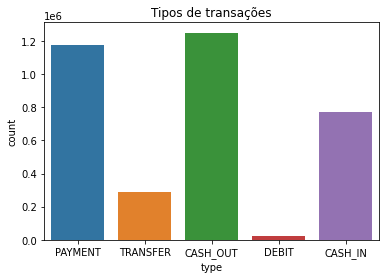

In [10]:
sns.countplot(df['type'])
plt.title('Tipos de transações');

As transações não-fraudulentas englobam os 5 tipos, com a mesma proporção citada anteriormente.

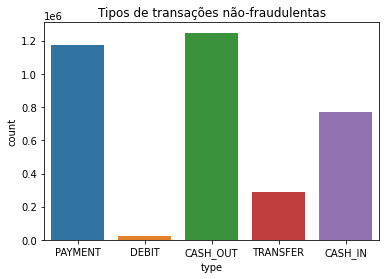

In [11]:
sns.countplot(df[df['isFraud'] == 0]['type'])
plt.title('Tipos de transações não-fraudulentas');

Já as transações fraudulentas do dataset só ocorrem em transferências e saques. 

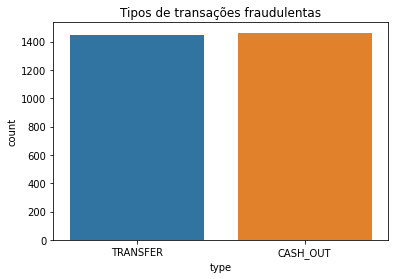

In [12]:
sns.countplot(df[df['isFraud'] == 1]['type'])
plt.title('Tipos de transações fraudulentas');

ANALISANDO A QUANTIDADE DE TRANSAÇÕES QUE SÃO FRAUDES OU NORMAIS

In [13]:
fraude = len(df[df.isFraud == 1])
nao_fraude = len(df[df.isFraud == 0])

print ("Fraude:", fraude)
print ("Normal:", nao_fraude)

Fraude: 2905
Normal: 3503327


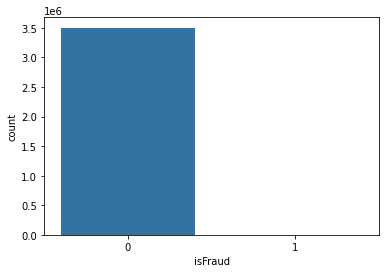

In [14]:
sns.countplot(df['isFraud']);

As transações que são consideradas fraudes representam apenas 0,13% das transações totais, o que significa, portanto, que os dados são desbalanceados.

ESTATÍSTICA DESCRITIVA DAS TRANSAÇÕES

In [15]:
df.groupby('isFraud')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,3503327.000,156428.898,257142.311,0.020,12685.295,76188.440,210843.955,9089850.370
1,2905.000,1325911.486,2170370.564,0.000,113614.570,407005.780,1476248.650,10000000.000


A média dos valores das transações fraudulentas é cerca de 10 vezes maior que a média das transações normais. Porém, as transações fraudulentas possuem um alto desvio padrão e sua mediana é cerca de 1 milhão de reais menor que a média, o que indica que elas podem acontecer com altos ou baixos valores.

HISTOGRAMAS DAS TRANSAÇÕES

Para uma melhor visualização dos dados, aplicarei uma transformação logarítimica: 

In [16]:
df['amount_log'] = np.log10(df['amount'])

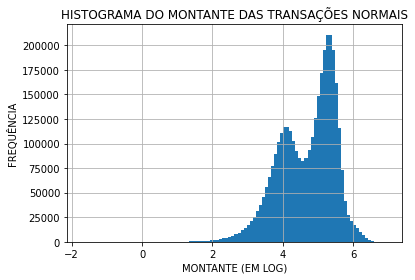

In [17]:
#histograma do montante das transações normais
df[df.isFraud == 0]['amount_log'].hist(bins=100)
plt.xlabel('MONTANTE (EM LOG)')
plt.ylabel('FREQUÊNCIA')
plt.title('HISTOGRAMA DO MONTANTE DAS TRANSAÇÕES NORMAIS');

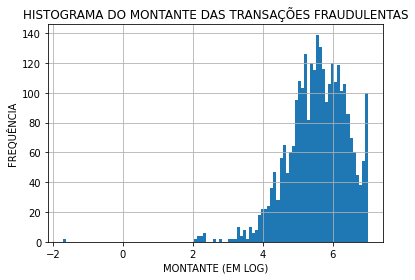

In [18]:
#histograma do montante das transações fraudulentas 
menor_valor = min(df[(df['amount_log']< 0) & (df['amount_log'] != float('-inf'))]['amount_log'])
df.amount_log.replace({float('-inf'): menor_valor}, inplace = True)
df[df.isFraud == 1]['amount_log'].hist(bins=100)
plt.xlabel('MONTANTE (EM LOG)')
plt.ylabel('FREQUÊNCIA')
plt.title('HISTOGRAMA DO MONTANTE DAS TRANSAÇÕES FRAUDULENTAS');

Pode-se perceber que, apesar de ocorrerem valores baixos nas transações fraudulentas, a maioria possui altos valores. Portanto, esse pode ser um indicativo de fraude: o valor da transação. 

#FEATURE ENGINEERING

Como há algumas colunas que possuem dados categóricos em formato textual (String), é necessário convertê-los para dados numéricos (INT), que são compreensíveis para o model. Para isso, utilizarei a função LabelEnconder.

In [19]:
enc =  LabelEncoder()
df['type_encode'] = enc.fit_transform(df['type'])
df['nameOrig_encode'] = enc.fit_transform(df['nameOrig'])
df['nameDest_encode'] = enc.fit_transform(df['nameDest'])

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_log,type_encode,nameOrig_encode,nameDest_encode
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0.000,3.993,3,418119,911995
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0.000,3.271,3,1207696,951372
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0.000,2.258,4,552967,243209
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0.000,2.258,1,3213810,216729
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0.000,4.067,3,1900136,456367


NORMALIZANDO OS DADOS

O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. 

In [21]:
normalizer = Normalizer()
amount_scale = normalizer.fit_transform(df.amount.values.reshape(1,-1))
df['amount_norm'] = amount_scale.reshape(-1,1)
amount_oldbalanceOrg = normalizer.fit_transform(df.oldbalanceOrg.values.reshape(1,-1))
df['oldbalanceOrg_norm'] = amount_oldbalanceOrg.reshape(-1,1)
amount_newbalanceOrig = normalizer.fit_transform(df.newbalanceOrig.values.reshape(1,-1))
df['newbalanceOrig_norm'] = amount_newbalanceOrig.reshape(-1,1)
amount_oldbalanceDest= normalizer.fit_transform(df.oldbalanceDest.values.reshape(1,-1))
df['oldbalanceDest_norm'] = amount_oldbalanceDest.reshape(-1,1)
amount_newbalanceDest = normalizer.fit_transform(df.newbalanceDest.values.reshape(1,-1))
df['newbalanceDest_norm'] = amount_newbalanceDest.reshape(-1,1)

In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_log,type_encode,nameOrig_encode,nameDest_encode,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm,newbalanceDest_norm
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0.000,3.993,3,418119,911995,0.000,0.000,0.000,0.000,0.000
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0.000,3.271,3,1207696,951372,0.000,0.000,0.000,0.000,0.000
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0.000,2.258,4,552967,243209,0.000,0.000,0.000,0.000,0.000
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0.000,2.258,1,3213810,216729,0.000,0.000,0.000,0.000,0.000
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0.000,4.067,3,1900136,456367,0.000,0.000,0.000,0.000,0.000


#BALANCEAMENTO DOS DADOS

Os modelos machine learning são construídos para minimizar erros. Como observado anteriormente, apenas 0,13% das transações são classificadas como fraudes, ou seja, os dados estão muito desbalanceados. Nesse caso, quando eu rodar o modelo, o algoritmo estará enviesado em classificar as novas observações. Para que isso não ocorra, utilizarei um método de balanceamento de dados chamado Random Under-Sampling. Esse método busca selecionar e remover aleatoriamente amostras da classe majoritária, consequentemente reduzindo o número de exemplos dessa classe nos dados transformados.

0    2905
1    2905
Name: isFraud, dtype: int64


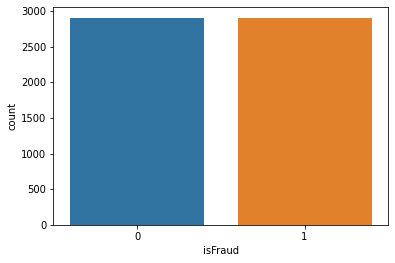

In [23]:
#balanceamento dos dados

#Balanceamento dos Dados com Under-Sampling(RUS)

x = df[['type_encode','nameOrig_encode','nameDest_encode','amount_norm',
          'oldbalanceOrg_norm','newbalanceOrig_norm',
          'oldbalanceDest_norm','newbalanceDest_norm']]
y = df["isFraud"]

# Definindo parâmetros
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(x, y)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_rus);

#RESAMPLING

In [24]:
X_rus['target'] = y_rus

In [25]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X_rus, target = 'target',
                                                                            train_size=0.7, valid_size=0.1, test_size=0.2)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(4066, 8)
(4066,)
(581, 8)
(581,)
(1163, 8)
(1163,)


(None, None)

#MACHINE LEARNING

RANDOM FOREST CLASSIFIER

Em português, Random Forest significa floresta aleatória. Este nome explica muito bem o funcionamento do algoritmo, que irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final.

Treinando o modelo: 

In [26]:
# Escolher e importar o modelo
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

Avaliação do desempenho do modelo para dados de teste: 

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       594
           1       0.99      0.98      0.98       569

    accuracy                           0.98      1163
   macro avg       0.98      0.98      0.98      1163
weighted avg       0.98      0.98      0.98      1163



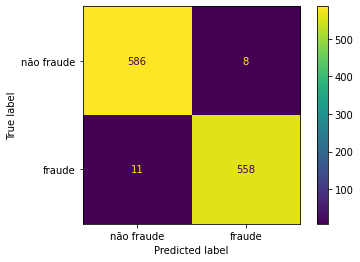

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['não fraude', 'fraude'])
ax = disp.plot(values_format='d') 

In [29]:
print("Acurácia do Modelo: ", accuracy_score(y_test, y_pred)) 

Acurácia do Modelo:  0.9836629406706793


In [30]:
 print('roc_auc_score do Modelo: ', roc_auc_score(y_test, y_pred))

roc_auc_score do Modelo:  0.983599912422408


- O MODELO POSSUI 28 TRANSAÇÕES CLASSIFICADAS COMO NÃO FRAUDES, MAS QUE NA VERDADE ERAM FRAUDES (FALSOS NEGATIVOS). É UM BOM RESULTADO, SIGNIFICA QUE O MODELO ESTÁ CONSEGUINDO CLASSIFICAR CORRETAMENTE A MAIORIA DAS TRANSAÇÕES FRAUDULENTAS.

- O MODELO POSSUI 10 TRANSAÇÕES QUE SÃO FALSOS POSITIVOS, OU SEJA, ELE CLASSIFICOU 10 TRANSAÇÕES COMO FRAUDES, QUANDO NA VERDADE ERAM TRANSAÇÕES NORMAIS. É UM BOM RESULTADO, VISTO A QUANTIDADE DE TRANSAÇÕES NÃO FRAUDULENTAS CLASSIFICADAS CORRETAMENTE.

- O PRECISION E O RECALL ESTÃO COM VALORES ALTOS PARA AMBAS AS CLASSES.

- A AUC DO MODELO TAMBÉM APRESENTOU UM ÓTIMO VALOR

- CONCLUSÃO: O MODELO DEMONSTRA TER UM EXCELENTE DESEMPENHO. .

Avaliando o desempenho do modelo para os dados de validação:

In [31]:
modelo_pred = RandomForestClassifier()

modelo_pred.fit(X_train, y_train)

y_pred_validacao = modelo_pred.predict(X_valid)

In [32]:
print(classification_report(y_valid, y_pred_validacao))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       276
           1       0.96      0.99      0.98       305

    accuracy                           0.98       581
   macro avg       0.98      0.98      0.98       581
weighted avg       0.98      0.98      0.98       581



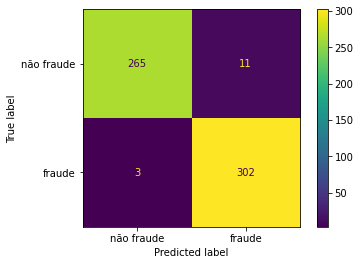

In [33]:
cm = confusion_matrix(y_valid, y_pred_validacao)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['não fraude', 'fraude'])
ax = disp.plot(values_format='d') 

In [34]:
print("Acurácia do Modelo: ", accuracy_score(y_valid, y_pred_validacao)) 

Acurácia do Modelo:  0.9759036144578314


In [35]:
 print('roc_auc_score do Modelo: ', roc_auc_score(y_valid, y_pred_validacao))

roc_auc_score do Modelo:  0.9751544309812308


OS DADOS DE VALIDAÇÃO SÃO UTILIZADOS PARA VALIDAR A ESTABILIDADE DO MODELO, GARANTIR QUE ELE ESTEJA GENERALIZANDO BEM SUAS CLASSIFICAÇÕES.

- O MODELO POSSUI 17 TRANSAÇÕES CLASSIFICADAS COMO NÃO FRAUDES, MAS QUE NA VERDADE ERAM FRAUDES (FALSOS NEGATIVOS). É UM BOM RESULTADO, SIGNIFICA QUE O MODELO ESTÁ CONSEGUINDO CLASSIFICAR CORRETAMENTE A MAIORIA DAS TRANSAÇÕES FRAUDULENTAS.

- O MODELO POSSUI 2 TRANSAÇÕES QUE SÃO FALSOS POSITIVOS, OU SEJA, ELE CLASSIFICOU 10 TRANSAÇÕES COMO FRAUDES, QUANDO NA VERDADE ERAM TRANSAÇÕES NORMAIS. É UM ÓTIMO RESULTADO.

- O PRECISION E O RECALL ESTÃO COM EXCELENTES VALORES PARA AMBAS AS CLASSES.

- A AUC DO MODELO TAMBÉM APRESENTOU UM ÓTIMO RESULTADO

- CONCLUSÃO: O MODELO ESTÁ GENERALIZANDO, OU SEJA, CLASSIFICANDO MUITO BEM TANTO OS DADOS DE TESTE, QUANTO OS DADOS DE VALIDAÇÃO.